<a href="https://colab.research.google.com/github/AmirHoseein99/Depression-Engine/blob/master/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import tensorflow as tf
import os, glob, librosa
! pip install tensorflow_io
import tensorflow_io as tfio
!pip install audiomentations
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask
from matplotlib import pyplot as plt

In [ ]:
z = np.zeros(33)
o = np.ones(14)
y_True = np.append(z, o)

In [ ]:
z = np.zeros(10)
o = np.ones(37)
y_pred_1 = np.append(z, o)

In [ ]:
y_pred = np.zeros(47)

In [ ]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
y_True

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
y_pred_1 = [0, 0, 0,0 ,0,0,0,0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 0, 0]

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

print("accuracy is ", accuracy_score(y_True, y_pred_1))
print("recall is : ", recall_score(y_True, y_pred_1))
print("precision is : ", precision_score(y_True, y_pred_1))
print("f1 is : ", f1_score(y_True, y_pred_1))

accuracy is  0.425531914893617
recall is :  0.8571428571428571
precision is :  0.32432432432432434
f1 is :  0.4705882352941177


In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
print("accuracy is ", accuracy_score(y_True, y_pred))
print("recall is : ", recall_score(y_True, y_pred))
print("precision is : ", precision_score(y_True, y_pred))
print("f1 is : ", f1_score(y_True, y_pred))

accuracy is  0.7021276595744681
recall is :  0.0
precision is :  0.0
f1 is :  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_True,y_pred_1)

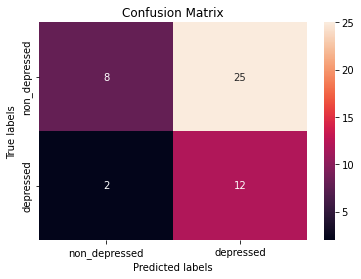

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['non_depressed', 'depressed']); ax.yaxis.set_ticklabels(['non_depressed', 'depressed']);

In [ ]:
import librosa.display

In [ ]:
!pip install pickle5
import pickle5 as pickle

with open("/content/drive/MyDrive/Train_sepcs/Depressed_Train", "rb") as fh:
  all_participants_mels = pickle.load(fh)

In [ ]:
all_participants_mels = np.array([item for sublist in all_participants_mels for item in sublist])

In [ ]:
sr_1 = 16000

In [ ]:
import IPython.display as ipd
ipd.Audio(all_participants_mels[0], rate=sr_1)

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


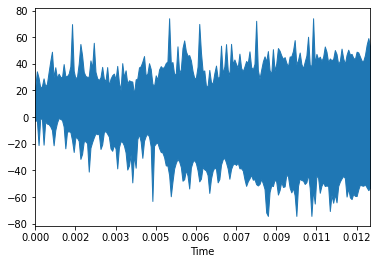

In [ ]:
_ = librosa.display.waveplot(all_participants_mels[0], sr=sr_1)

In [ ]:
librosa.display.specshow(all_participants_mels[0], sr=sr_1, hop_length=160, x_axis='time', y_axis='linear')

In [ ]:
freq_mask = tfio.audio.freq_mask(all_participants_mels[0], param=10)
librosa.display.specshow(freq_mask.numpy(), sr=sr_1, hop_length=160, x_axis='time', y_axis='linear')

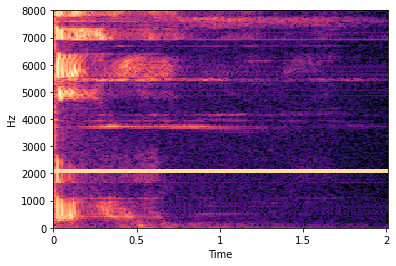

In [ ]:
time_mask = tfio.audio.time_mask(all_participants_mels[0], param=10)

plt.figure()
librosa.display.specshow(time_mask.numpy(), sr=sr_1, hop_length=160, x_axis='time', y_axis='linear')

In [ ]:
augmented_specs = []
for spect in all_participants_mels:
    freq_mask = tfio.audio.freq_mask(spect, param=10)
    time_mask = tfio.audio.time_mask(spect, param=10)
    augmented_specs.append(freq_mask.numpy())
    augmented_specs.append(time_mask.numpy())
augmented_specs = np.array(augmented_specs)
# all_participants_mels = np.array([item for sublist in all_participants_mels for item in sublist])
# augmented_specs = np.array([item for sublist in augmented_specs for item in sublist])

In [ ]:
print(all_participants_mels.shape)
print(augmented_specs.shape)

(6516, 201, 201)
(13032, 201, 201)


In [ ]:
all_participants_mels = np.append(all_participants_mels, augmented_specs, axis=0)
augmented_specs = 0

In [ ]:
y_train = np.ones(all_participants_mels.shape[0], dtype=object).reshape(-1, 1)

In [ ]:
print(y_train.shape)
print(all_participants_mels.shape)

(19548, 1)
(19548, 201, 201)


In [ ]:
pd.to_pickle(all_participants_mels, "/content/drive/MyDrive/Train_sepcs/augmented/Depressed_Train")
pd.to_pickle(y_train, "/content/drive/MyDrive/Train_sepcs/Depressed_label")